#Credit Score Prediction#

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = '/content/gdrive/MyDrive/Colab Notebooks/CreditWorthiness Project/files/CreditPrediction.csv'

In [ ]:
import pandas as pd
import numpy as np
customer_dataset = pd.read_csv(path)
customer_dataset.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 19
0,768805383,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,NaN
1,818770008,49.0,F,5,Graduate,NaN,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105,NaN
2,713982108,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,NaN
3,769911858,40.0,F,4,High School,NaN,Less than $40K,Blue,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,NaN
4,709106358,40.0,M,3,Uneducated,Married,$60K - $80K,NaN,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000,NaN


## 1. Data Exploration and Analysis (EDA)


###Data Information

In [ ]:
customer_dataset.shape

(10167, 20)

In [ ]:
customer_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10167.0,7.391864e+08,3.690366e+07,708082083.0,7.130407e+08,7.179400e+08,7.731435e+08,8.283431e+08
Customer_Age,10167.0,4.675382e+01,1.352051e+01,26.0,4.100000e+01,4.600000e+01,5.200000e+01,3.523305e+02
Dependent_count,10167.0,2.346513e+00,1.298701e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,9944.0,3.591342e+01,7.980102e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10147.0,3.813245e+00,1.554741e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10167.0,2.341595e+00,1.010502e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10167.0,2.455887e+00,1.105580e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10167.0,8.632552e+03,9.087334e+03,1438.3,2.556500e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10167.0,1.162177e+03,8.150826e+02,0.0,3.485000e+02,1.276000e+03,1.783000e+03,2.517000e+03
Total_Amt_Chng_Q4_Q1,10167.0,7.597215e-01,2.190539e-01,0.0,6.310000e-01,7.360000e-01,8.590000e-01,3.397000e+00


In [ ]:
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10167 non-null  int64  
 1   Customer_Age              10167 non-null  float64
 2   Gender                    9968 non-null   object 
 3   Dependent_count           10167 non-null  int64  
 4   Education_Level           10167 non-null  object 
 5   Marital_Status            8217 non-null   object 
 6   Income_Category           10167 non-null  object 
 7   Card_Category             8243 non-null   object 
 8   Months_on_book            9944 non-null   float64
 9   Total_Relationship_Count  10147 non-null  float64
 10  Months_Inactive_12_mon    10167 non-null  int64  
 11  Contacts_Count_12_mon     10167 non-null  int64  
 12  Credit_Limit              10167 non-null  float64
 13  Total_Revolving_Bal       10167 non-null  int64  
 14  Total_

###Data Distribution

#### Numerical Feature - Histogram Plot

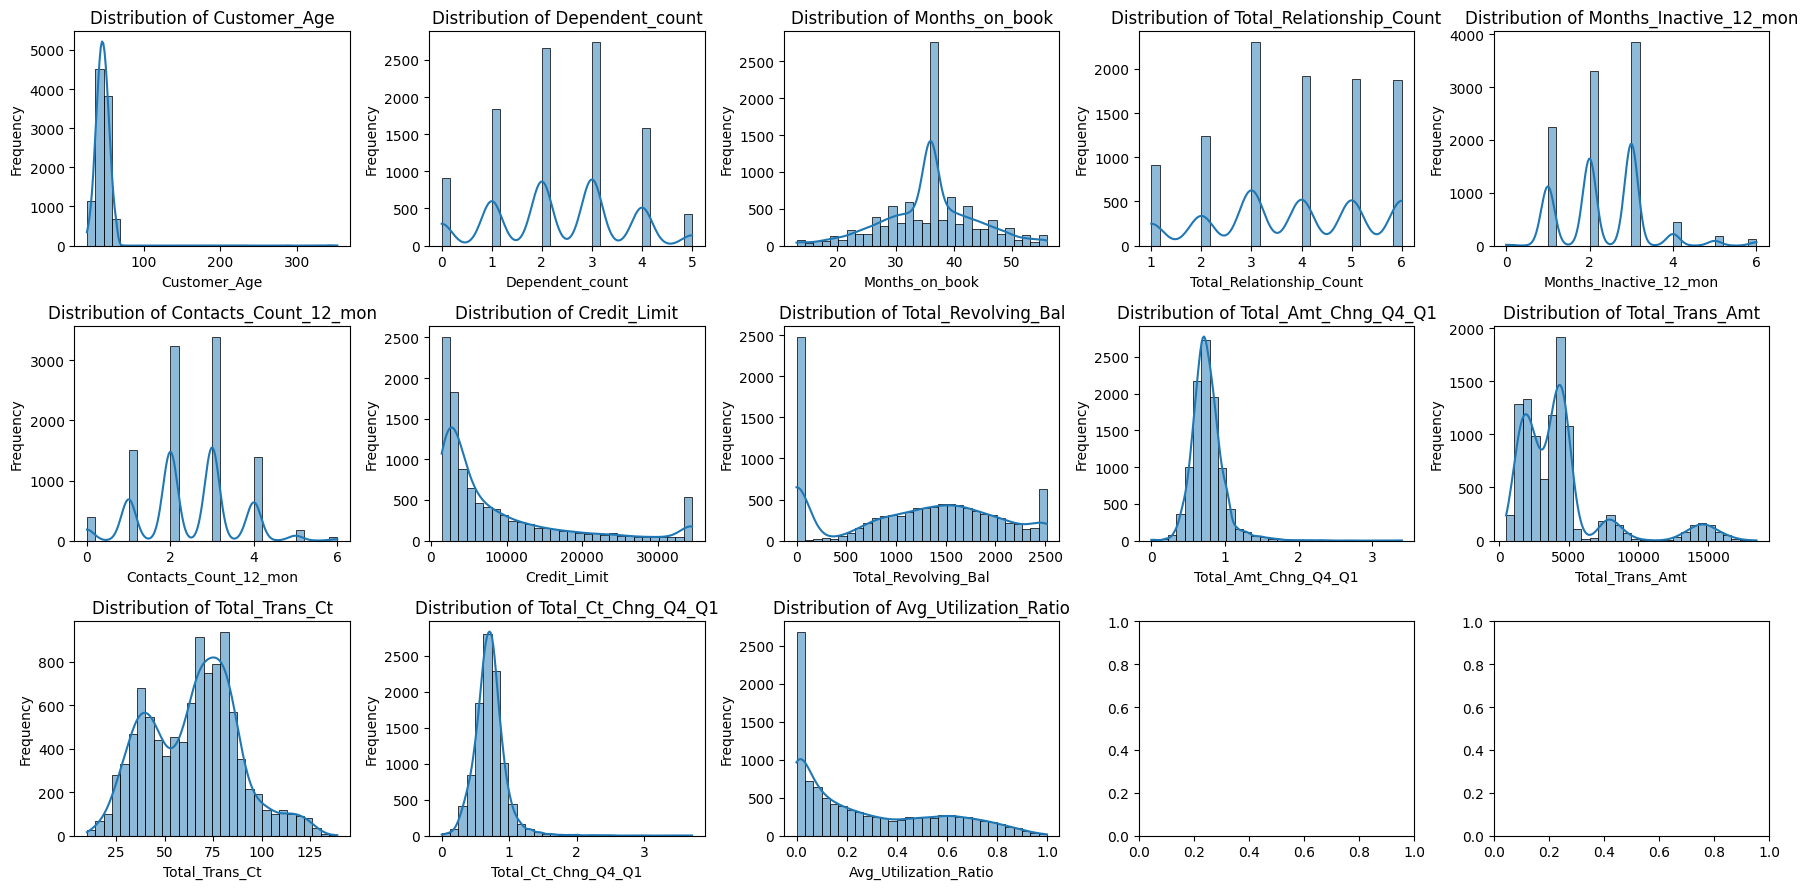

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
    'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

# Calculate the number of rows needed based on the number of features
num_features = len(numerical_features)
rows = (num_features // 5) + (num_features % 5 > 0)

# Create subplots: rows by 5 columns
fig, axs = plt.subplots(rows, 5, figsize=(18, 3*rows))

# Flatten the axs array if it's multi-dimensional
axs = axs.flatten()

#Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(customer_dataset[feature], kde=True, bins=30, ax=axs[i]) #KDE is a way to estimate the probability density function of a continuous random variable, it adds a KDE curve to your plot.
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Numerical Feature - Box Plot


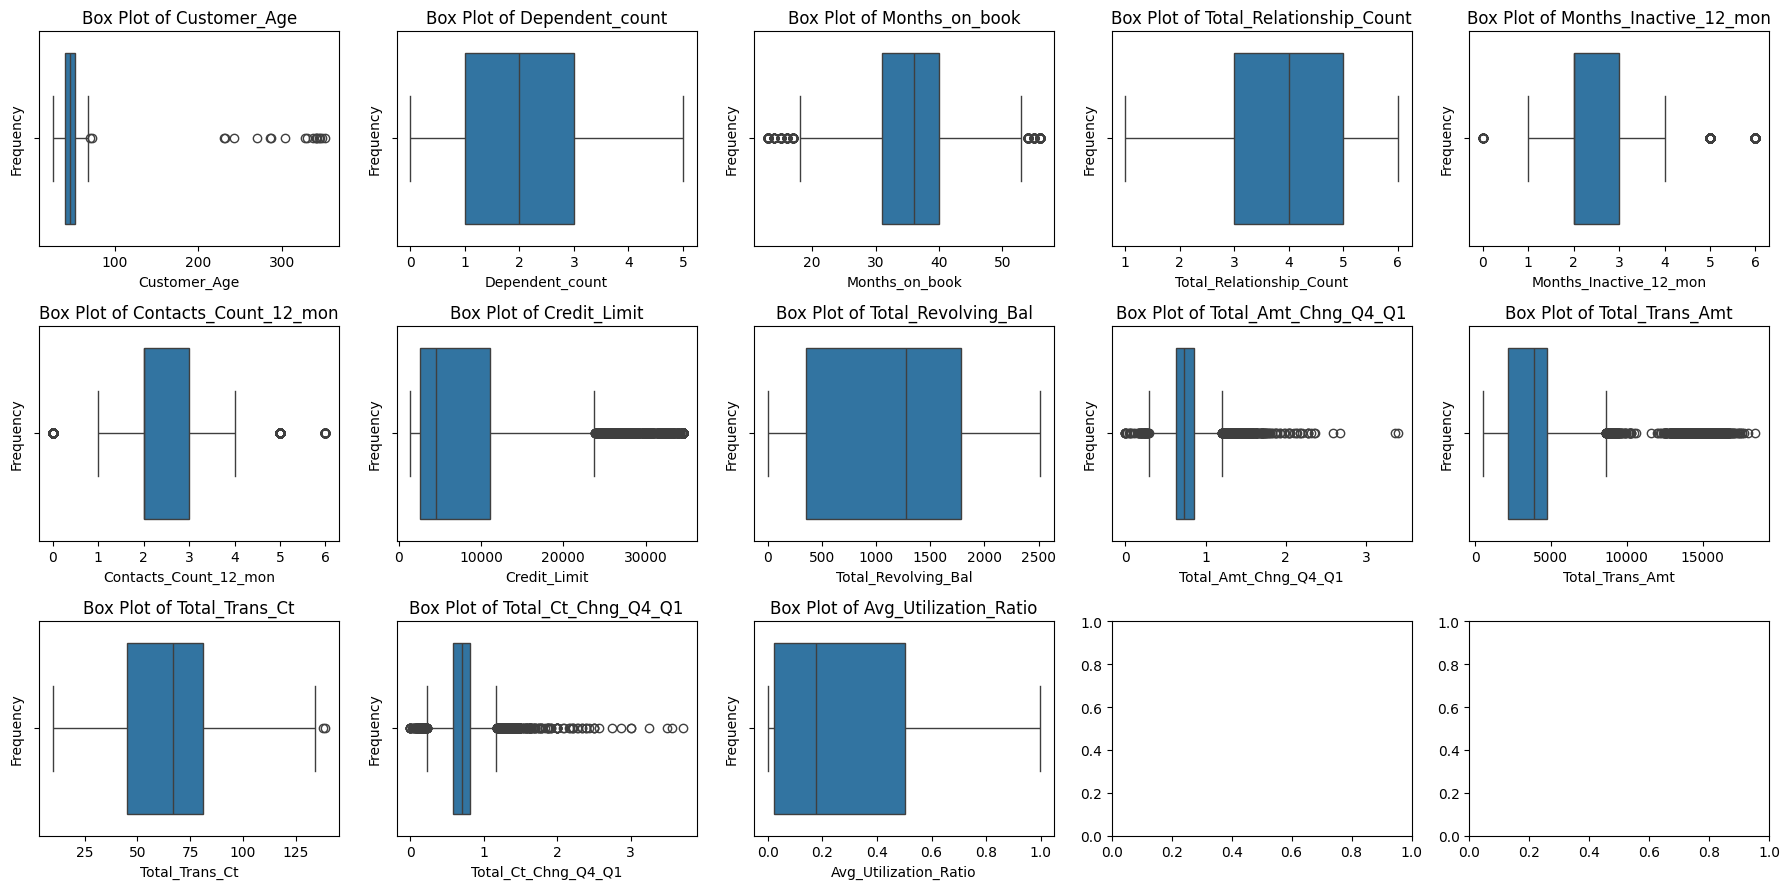

In [ ]:
# Create subplots: rows by 5 columns
fig, axs = plt.subplots(rows, 5, figsize=(18, 3*rows))

# Flatten the axs array if it's multi-dimensional
axs = axs.flatten()

# Plotting box plots for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=customer_dataset[feature], ax=axs[i])
    axs[i].set_title(f'Box Plot of {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

####Checking for skewness and outliers

The top 5 variables have skewness > 1 or < -1, and are exactly the variables with a lot of outliers (Credit_Limit, Avg_Open_to_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, and Total_Ct_Chng_Q4_Q1).

In [ ]:
customer_dataset.select_dtypes(exclude=['object']).skew().abs().sort_values(ascending=False)

,0
Customer_Age,13.149889
Total_Ct_Chng_Q4_Q1,2.061664
Total_Trans_Amt,2.042601
Total_Amt_Chng_Q4_Q1,1.730237
Credit_Limit,1.666825
CLIENTNUM,0.995068
Avg_Utilization_Ratio,0.718461
Months_Inactive_12_mon,0.634065
Total_Relationship_Count,0.163325
Total_Trans_Ct,0.152302


#### Categorical Feature - Count Plot

<ipython-input-12-0a8d42a9f513>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(customer_dataset[feature],  palette='viridis', ax=axs[i])
<ipython-input-12-0a8d42a9f513>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(customer_dataset[feature],  palette='viridis', ax=axs[i])
<ipython-input-12-0a8d42a9f513>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(customer_dataset[feature],  palette='viridis', ax=axs[i])
<ipython-input-12-0a8d42a9f513>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

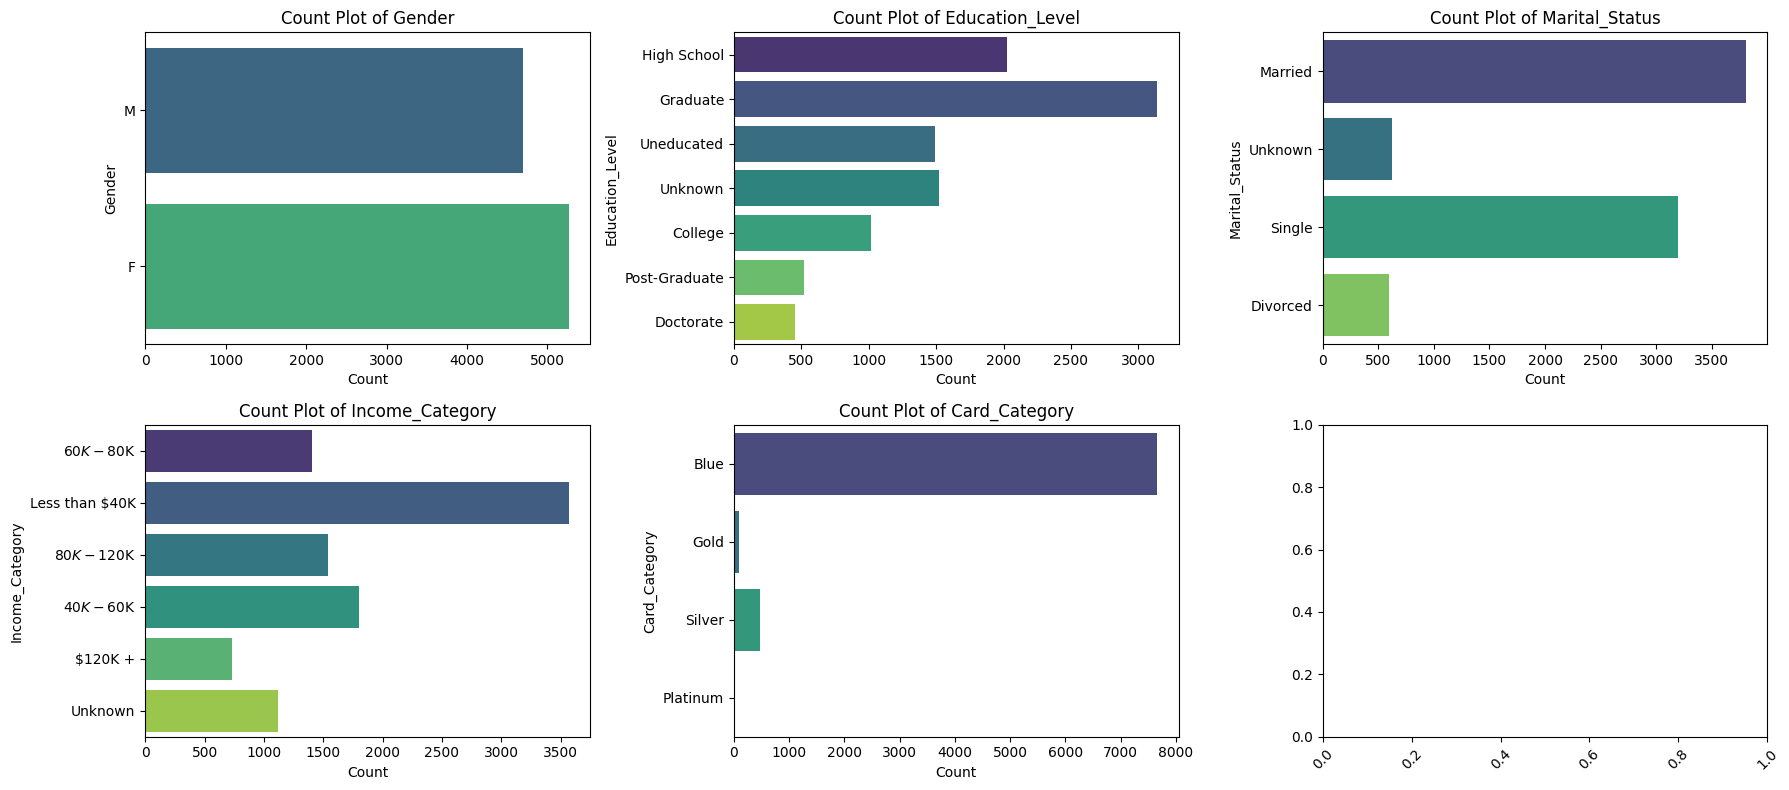

In [ ]:
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Calculate the number of rows needed based on the number of features
cat_features = len(categorical_features)
rows = (cat_features // 3) + (cat_features % 3 > 0)

# Create subplots: rows by 3 columns
fig, axs = plt.subplots(rows, 3, figsize=(18, 4*rows))

# Flatten the axs array if it's multi-dimensional
axs = axs.flatten()

# Visualisation - Plot histograms for each numerical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(customer_dataset[feature],  palette='viridis', ax=axs[i])
    axs[i].set_title(f'Count Plot of {feature}')
    axs[i].set_xlabel('Count')
    axs[i].set_ylabel(feature)

# Adjust layout to prevent overlap
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#### Correlation between Matrix

In [ ]:
# Calculate the correlation matrix
correlation_matrix = customer_dataset[numerical_features].corr()
correlation_matrix

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.078629,0.497612,-0.024905,0.031812,0.005760,0.004231,0.005412,-0.049989,-0.020583,-0.027606,-0.009829,0.003578
Dependent_count,-0.078629,1.000000,-0.102708,-0.038545,-0.010377,-0.040701,0.069186,-0.003405,-0.035484,0.025201,0.049570,0.011272,-0.038434
Months_on_book,0.497612,-0.102708,1.000000,-0.010087,0.074342,-0.008802,0.007474,0.007992,-0.050126,-0.037981,-0.049900,-0.016121,-0.007573
Total_Relationship_Count,-0.024905,-0.038545,-0.010087,1.000000,-0.004186,0.055855,-0.071130,0.013697,0.051375,-0.347277,-0.242599,0.041854,0.067456
Months_Inactive_12_mon,0.031812,-0.010377,0.074342,-0.004186,1.000000,0.029294,-0.019817,-0.041306,-0.032410,-0.036763,-0.042513,-0.038892,-0.007402
Contacts_Count_12_mon,0.005760,-0.040701,-0.008802,0.055855,0.029294,1.000000,0.020276,-0.053951,-0.024218,-0.112656,-0.152324,-0.094957,-0.055641
Credit_Limit,0.004231,0.069186,0.007474,-0.071130,-0.019817,0.020276,1.000000,0.041917,0.012300,0.171422,0.075940,-0.002328,-0.482844
Total_Revolving_Bal,0.005412,-0.003405,0.007992,0.013697,-0.041306,-0.053951,0.041917,1.000000,0.057957,0.064474,0.056051,0.089037,0.624469
Total_Amt_Chng_Q4_Q1,-0.049989,-0.035484,-0.050126,0.051375,-0.032410,-0.024218,0.012300,0.057957,1.000000,0.039713,0.005131,0.384422,0.035523
Total_Trans_Amt,-0.020583,0.025201,-0.037981,-0.347277,-0.036763,-0.112656,0.171422,0.064474,0.039713,1.000000,0.807041,0.085334,-0.082809


#### HeatMap
Plot a correlation heatmap

- annot=True: Annotates each cell with the correlation coefficient value.
- cmap='coolwarm': Specifies the color palette, where positive correlations are usually shown in shades of red and negative correlations in shades of blue.
- vmin=-1 and vmax=1: Set the range of values for the color bar, ensuring that the full spectrum from -1 to 1 is displayed.
- center=0: Centers the color map at 0, making it easier to distinguish between positive and negative correlations.

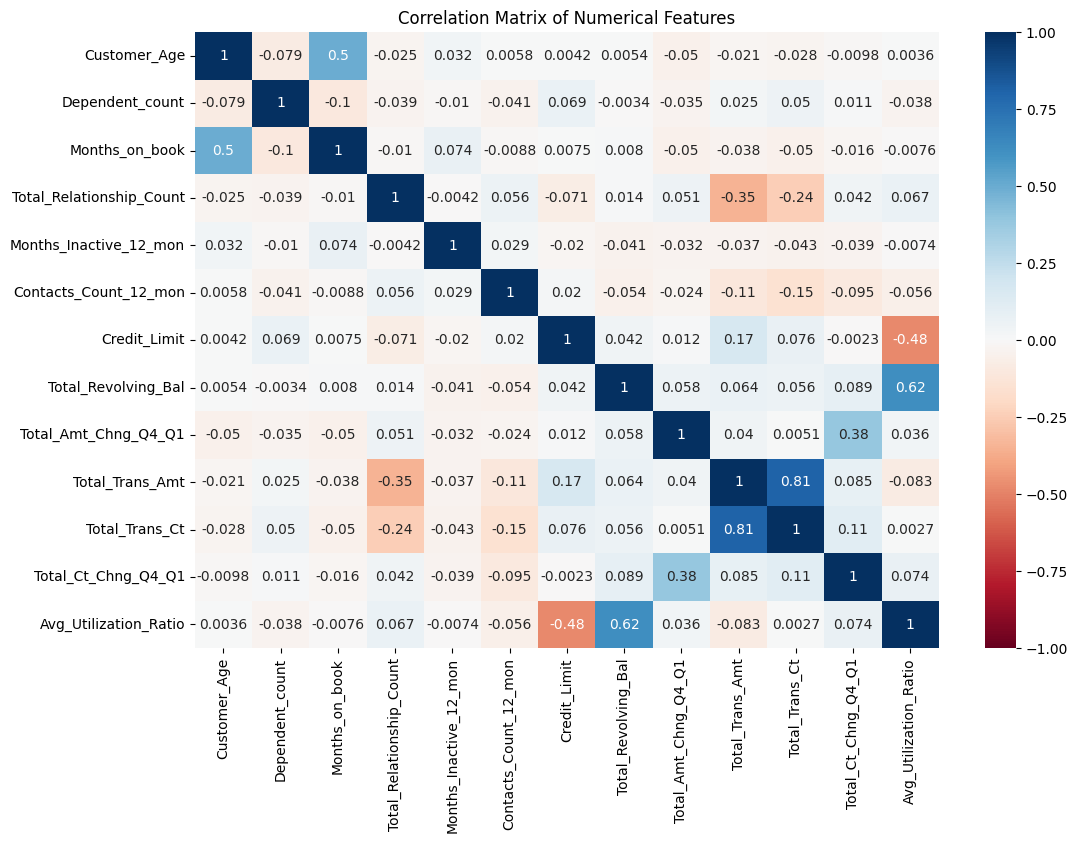

In [ ]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## 2. Data Cleaning


#### Missing Value Identification

In [ ]:
percent_missing = customer_dataset.isnull().sum() * 100 / len(customer_dataset)
percent_missing

,0
CLIENTNUM,0.000000
Customer_Age,0.000000
Gender,1.957313
Dependent_count,0.000000
Education_Level,0.000000
Marital_Status,19.179699
Income_Category,0.000000
Card_Category,18.923970
Months_on_book,2.193371
Total_Relationship_Count,0.196715


###Encoding###
It is the process of converting categorical data (non-numeric data, like text) into a numerical format that a machine learning model can understand and process

Label Encoding
- Works well with models requiring numerical inputs: Algorithms like support vector machines (SVM) or logistic regression need numeric input.
Missing values as a category: If missing values have meaning (e.g., "Unknown" could imply a special group), treating them as a separate category via encoding can be beneficial.

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
customer_dataset['Marital_Status_encoded']= label_encoder.fit_transform(customer_dataset['Marital_Status'])
customer_dataset['Gender_encoded']= label_encoder.fit_transform(customer_dataset['Gender'])
customer_dataset['Education_Level_encoded']= label_encoder.fit_transform(customer_dataset['Education_Level'])
customer_dataset['Card_Category_encoded']= label_encoder.fit_transform(customer_dataset['Card_Category'])
customer_dataset['Income_Category_encoded']= label_encoder.fit_transform(customer_dataset['Income_Category'])
customer_dataset

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 19,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded
0,768805383,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,...,1144,42,1.625,0.061,NaN,1,1,3,0,2
1,818770008,49.0,F,5,Graduate,NaN,Less than $40K,Blue,44.0,6.0,...,1291,33,3.714,0.105,NaN,4,0,2,0,4
2,713982108,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,...,1887,20,2.333,0.000,NaN,1,1,2,0,3
3,769911858,40.0,F,4,High School,NaN,Less than $40K,Blue,34.0,3.0,...,1171,20,2.333,0.760,NaN,4,0,3,0,4
4,709106358,40.0,M,3,Uneducated,Married,$60K - $80K,NaN,21.0,5.0,...,816,28,2.500,0.000,NaN,1,1,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,718673358,35.0,M,3,Doctorate,NaN,$80K - $120K,Blue,30.0,5.0,...,2137,52,0.486,0.112,NaN,4,1,1,0,3
10163,715207458,46.0,F,1,Unknown,Single,Less than $40K,Blue,39.0,2.0,...,4802,90,0.800,0.529,NaN,2,0,6,0,4
10164,803665983,52.0,M,0,Unknown,NaN,$60K - $80K,Blue,46.0,3.0,...,3829,72,0.532,0.796,NaN,4,1,6,0,2
10165,713183508,39.0,F,1,High School,NaN,Unknown,NaN,36.0,1.0,...,4861,82,0.822,0.421,NaN,4,0,3,4,5


####Drop Extra Columns

In [ ]:
df = customer_dataset.drop(columns=['CLIENTNUM','Income_Category','Gender','Dependent_count','Education_Level','Marital_Status', 'Card_Category', 'Unnamed: 19'])
df

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded
0,45.0,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,1,1,3,0,2
1,49.0,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105,4,0,2,0,4
2,51.0,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,1,1,2,0,3
3,40.0,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,4,0,3,0,4
4,40.0,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000,1,1,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,35.0,30.0,5.0,3,4,13590.0,1528,0.728,2137,52,0.486,0.112,4,1,1,0,3
10163,46.0,39.0,2.0,2,1,2029.0,1074,0.514,4802,90,0.800,0.529,2,0,6,0,4
10164,52.0,46.0,3.0,2,4,2742.0,2184,0.592,3829,72,0.532,0.796,4,1,6,0,2
10165,39.0,36.0,1.0,3,2,2751.0,1158,0.821,4861,82,0.822,0.421,4,0,3,4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10167 non-null  float64
 1   Months_on_book            9944 non-null   float64
 2   Total_Relationship_Count  10147 non-null  float64
 3   Months_Inactive_12_mon    10167 non-null  int64  
 4   Contacts_Count_12_mon     10167 non-null  int64  
 5   Credit_Limit              10167 non-null  float64
 6   Total_Revolving_Bal       10167 non-null  int64  
 7   Total_Amt_Chng_Q4_Q1      10167 non-null  float64
 8   Total_Trans_Amt           10167 non-null  int64  
 9   Total_Trans_Ct            10167 non-null  int64  
 10  Total_Ct_Chng_Q4_Q1       10167 non-null  float64
 11  Avg_Utilization_Ratio     10167 non-null  float64
 12  Marital_Status_encoded    10167 non-null  int64  
 13  Gender_encoded            10167 non-null  int64  
 14  Educat

Find %age of missing values in dataset

In [ ]:
#find missing values in dataset
percent_missing1 = df.isnull().sum() * 100 / len(df)
percent_missing1

,0
Customer_Age,0.000000
Months_on_book,2.193371
Total_Relationship_Count,0.196715
Months_Inactive_12_mon,0.000000
Contacts_Count_12_mon,0.000000
Credit_Limit,0.000000
Total_Revolving_Bal,0.000000
Total_Amt_Chng_Q4_Q1,0.000000
Total_Trans_Amt,0.000000
Total_Trans_Ct,0.000000


Replace Missing Values

In [ ]:
# replace missing val with mean
df.dtypes
df.describe().T
describe_output = df.describe()

mean_values = describe_output.loc['mean']
df.fillna(mean_values, inplace=True)
df

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded
0,45.0,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,1,1,3,0,2
1,49.0,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105,4,0,2,0,4
2,51.0,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,1,1,2,0,3
3,40.0,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,4,0,3,0,4
4,40.0,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000,1,1,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,35.0,30.0,5.0,3,4,13590.0,1528,0.728,2137,52,0.486,0.112,4,1,1,0,3
10163,46.0,39.0,2.0,2,1,2029.0,1074,0.514,4802,90,0.800,0.529,2,0,6,0,4
10164,52.0,46.0,3.0,2,4,2742.0,2184,0.592,3829,72,0.532,0.796,4,1,6,0,2
10165,39.0,36.0,1.0,3,2,2751.0,1158,0.821,4861,82,0.822,0.421,4,0,3,4,5


In [ ]:
#find again if any missing or null value
percent_missing2 = df.isnull().sum() * 100 / len(df)
percent_missing2

,0
Customer_Age,0.0
Months_on_book,0.0
Total_Relationship_Count,0.0
Months_Inactive_12_mon,0.0
Contacts_Count_12_mon,0.0
Credit_Limit,0.0
Total_Revolving_Bal,0.0
Total_Amt_Chng_Q4_Q1,0.0
Total_Trans_Amt,0.0
Total_Trans_Ct,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10167 non-null  float64
 1   Months_on_book            10167 non-null  float64
 2   Total_Relationship_Count  10167 non-null  float64
 3   Months_Inactive_12_mon    10167 non-null  int64  
 4   Contacts_Count_12_mon     10167 non-null  int64  
 5   Credit_Limit              10167 non-null  float64
 6   Total_Revolving_Bal       10167 non-null  int64  
 7   Total_Amt_Chng_Q4_Q1      10167 non-null  float64
 8   Total_Trans_Amt           10167 non-null  int64  
 9   Total_Trans_Ct            10167 non-null  int64  
 10  Total_Ct_Chng_Q4_Q1       10167 non-null  float64
 11  Avg_Utilization_Ratio     10167 non-null  float64
 12  Marital_Status_encoded    10167 non-null  int64  
 13  Gender_encoded            10167 non-null  int64  
 14  Educat

Drop Duplicates

In [ ]:
# find duplicate rows
duplicate_rows = df[df.duplicated()] # 35 duplicates (10167 to 10132 rows)
duplicate_rows

# Remove duplicate rows
df_cleaned = df.drop_duplicates()
df_cleaned

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded
0,45.0,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,1,1,3,0,2
1,49.0,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105,4,0,2,0,4
2,51.0,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,1,1,2,0,3
3,40.0,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,4,0,3,0,4
4,40.0,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000,1,1,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10128,37.0,18.0,4.0,1,3,2179.0,0,0.725,2568,48,0.297,0.000,4,0,3,4,5
10134,53.0,33.0,3.0,3,1,4065.0,2180,0.321,1271,36,0.200,0.536,4,1,0,0,1
10135,56.0,43.0,6.0,3,2,3068.0,1765,0.853,4611,73,0.698,0.575,1,0,5,0,5
10136,37.0,32.0,6.0,1,3,1438.3,0,0.707,4733,89,0.816,0.000,1,0,2,4,4


In [ ]:
#change data type - since Months_on_book and Total_Relationship_Count has integer values in dataset
df['Months_on_book'] = df['Months_on_book'].astype(int)
df['Total_Relationship_Count'] = df['Total_Relationship_Count'].astype(int)
df.dtypes

,0
Customer_Age,float64
Months_on_book,int64
Total_Relationship_Count,int64
Months_Inactive_12_mon,int64
Contacts_Count_12_mon,int64
Credit_Limit,float64
Total_Revolving_Bal,int64
Total_Amt_Chng_Q4_Q1,float64
Total_Trans_Amt,int64
Total_Trans_Ct,int64


## 3. Featured Engineering

###Credit Score Feature

1.	Payment History (35%)
  -	Months_Inactive_12_mon
  -	Contacts_Count_12_mon
  - Total_Ct_Chng_Q4_Q1
2. Amounts Owed (30%)
  -	Credit_Limit
  -	Total_Revolving_Bal
  - Avg_Utilization_Ratio
3. Length of Credit History (15%)
  -	Months_on_book
4. Types of Credit Used (10%)
  -	Total_Relationship_Count
  - Card_Category
5. New Credit (10%)
  - Total_Ct_Chng_Q4_Q1
  - Total_Amt_Chng_Q4_Q1

####1. Payment History (35%)
- Months_Inactive_12_mon
- Contacts_Count_12_mon

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assign weights (you can adjust based on importance)
w1 = 0.4  # Weight for Months_Inactive_12_mon
w2 = 0.3  # Weight for Contacts_Count_12_mon
w3 = 0.3  # Weight for Total_Ct_Chng_Q4_Q1

# Normalize features
scaler = MinMaxScaler()
df[['Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Ct_Chng_Q4_Q1']] = scaler.fit_transform(df[['Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Ct_Chng_Q4_Q1']])

# Calculate Payment History Score
df['Payment_History_Score'] = (
    w1 * df['Months_Inactive_12_mon'] +
    w2 * df['Contacts_Count_12_mon'] +
    w3 * df['Total_Ct_Chng_Q4_Q1']
)

df

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded,Payment_History_Score
0,45.0,39,5,0.166667,0.500000,12691.0,777,1.335,1144,42,0.437534,0.061,1,1,3,0,2,0.347927
1,49.0,44,6,0.166667,0.333333,8256.0,864,1.541,1291,33,1.000000,0.105,4,0,2,0,4,0.466667
2,51.0,36,4,0.166667,0.000000,3418.0,0,2.594,1887,20,0.628164,0.000,1,1,2,0,3,0.255116
3,40.0,34,3,0.666667,0.166667,3313.0,2517,1.405,1171,20,0.628164,0.760,4,0,3,0,4,0.505116
4,40.0,21,5,0.166667,0.000000,4716.0,0,2.175,816,28,0.673129,0.000,1,1,5,4,2,0.268605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,35.0,30,5,0.500000,0.666667,13590.0,1528,0.728,2137,52,0.130856,0.112,4,1,1,0,3,0.439257
10163,46.0,39,2,0.333333,0.166667,2029.0,1074,0.514,4802,90,0.215401,0.529,2,0,6,0,4,0.247954
10164,52.0,46,3,0.333333,0.666667,2742.0,2184,0.592,3829,72,0.143242,0.796,4,1,6,0,2,0.376306
10165,39.0,36,1,0.500000,0.333333,2751.0,1158,0.821,4861,82,0.221325,0.421,4,0,3,4,5,0.366397


In [ ]:
df.describe() #used minmax scaler because min has 0 amd max has 1

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded,Payment_History_Score
count,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000
mean,46.753817,35.893381,3.811646,0.390266,0.409314,8632.552346,1162.176748,0.759721,4402.349661,64.864463,0.191759,0.274716,1.952887,0.501721,3.094325,0.906560,2.864562,0.336428
std,13.520505,7.893226,1.553629,0.168417,0.184263,9087.333842,815.082643,0.219054,3393.953441,23.461680,0.064064,0.275638,1.198006,0.537747,1.834553,1.622596,1.505074,0.088764
min,26.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072698
25%,41.000000,32.000000,3.000000,0.333333,0.333333,2556.500000,348.500000,0.631000,2155.500000,45.000000,0.156704,0.022000,1.000000,0.000000,2.000000,0.000000,2.000000,0.276508
50%,46.000000,36.000000,4.000000,0.333333,0.333333,4549.000000,1276.000000,0.736000,3900.000000,67.000000,0.189015,0.175000,2.000000,0.000000,3.000000,0.000000,3.000000,0.337211
75%,52.000000,40.000000,5.000000,0.500000,0.500000,11067.500000,1783.000000,0.859000,4740.000000,81.000000,0.220248,0.502500,3.000000,1.000000,5.000000,0.000000,4.000000,0.396365
max,352.330517,56.000000,6.000000,1.000000,1.000000,34516.000000,2517.000000,3.397000,18484.000000,139.000000,1.000000,0.999000,4.000000,2.000000,6.000000,4.000000,5.000000,0.761309


####2. Amounts Owed (30%)
  -	Credit_Limit
  -	Total_Revolving_Bal
  - Avg_Utilization_Ratio

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose scaler
# scaler = StandardScaler()
scaler = MinMaxScaler()  # Uncomment to use MinMaxScaler

w1 = 0.4  # Weight for Months_Inactive_12_mon
w2 = 0.3  # Weight for Contacts_Count_12_mon
w3 = 0.3  # Weight for Total_Ct_Chng_Q4_Q1

# Normalize features
scaler = MinMaxScaler()
df[['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio']] = scaler.fit_transform(df[['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio']])

# Calculate Payment History Score
df['Amounts_Owed'] = (
    w1 * df['Credit_Limit'] +
    w2 * df['Total_Revolving_Bal'] +
    w3 * df['Avg_Utilization_Ratio']
)

df

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded,Payment_History_Score,Amounts_Owed
0,45.0,39,5,0.166667,0.500000,0.340190,0.308701,1.335,1144,42,0.437534,0.061061,1,1,3,0,2,0.347927,0.247005
1,49.0,44,6,0.166667,0.333333,0.206112,0.343266,1.541,1291,33,1.000000,0.105105,4,0,2,0,4,0.466667,0.216956
2,51.0,36,4,0.166667,0.000000,0.059850,0.000000,2.594,1887,20,0.628164,0.000000,1,1,2,0,3,0.255116,0.023940
3,40.0,34,3,0.666667,0.166667,0.056676,1.000000,1.405,1171,20,0.628164,0.760761,4,0,3,0,4,0.505116,0.550898
4,40.0,21,5,0.166667,0.000000,0.099091,0.000000,2.175,816,28,0.673129,0.000000,1,1,5,4,2,0.268605,0.039636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,35.0,30,5,0.500000,0.666667,0.367368,0.607072,0.728,2137,52,0.130856,0.112112,4,1,1,0,3,0.439257,0.362703
10163,46.0,39,2,0.333333,0.166667,0.017858,0.426698,0.514,4802,90,0.215401,0.529530,2,0,6,0,4,0.247954,0.294012
10164,52.0,46,3,0.333333,0.666667,0.039413,0.867700,0.592,3829,72,0.143242,0.796797,4,1,6,0,2,0.376306,0.515114
10165,39.0,36,1,0.500000,0.333333,0.039685,0.460072,0.821,4861,82,0.221325,0.421421,4,0,3,4,5,0.366397,0.280322


In [ ]:
df.describe() # min 0 max 1 for  Credit_Limit, Total_Revolving_Bal,  Avg_Utilization_Ratio

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded,Payment_History_Score,Amounts_Owed
count,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000
mean,46.753817,35.893381,3.811646,0.390266,0.409314,0.217496,0.461731,0.759721,4402.349661,64.864463,0.191759,0.274991,1.952887,0.501721,3.094325,0.906560,2.864562,0.336428,0.308015
std,13.520505,7.893226,1.553629,0.168417,0.184263,0.274727,0.323831,0.219054,3393.953441,23.461680,0.064064,0.275914,1.198006,0.537747,1.834553,1.622596,1.505074,0.088764,0.174699
min,26.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072698,0.000000
25%,41.000000,32.000000,3.000000,0.333333,0.333333,0.033805,0.138458,0.631000,2155.500000,45.000000,0.156704,0.022022,1.000000,0.000000,2.000000,0.000000,2.000000,0.276508,0.192962
50%,46.000000,36.000000,4.000000,0.333333,0.333333,0.094042,0.506953,0.736000,3900.000000,67.000000,0.189015,0.175175,2.000000,0.000000,3.000000,0.000000,3.000000,0.337211,0.332817
75%,52.000000,40.000000,5.000000,0.500000,0.500000,0.291109,0.708383,0.859000,4740.000000,81.000000,0.220248,0.503003,3.000000,1.000000,5.000000,0.000000,4.000000,0.396365,0.431527
max,352.330517,56.000000,6.000000,1.000000,1.000000,1.000000,1.000000,3.397000,18484.000000,139.000000,1.000000,1.000000,4.000000,2.000000,6.000000,4.000000,5.000000,0.761309,0.721922


####3. Length of Credit History (15%)
  -	Months_on_book

In [ ]:
# To Calculate Length_of_Credit_History, convert Months_on_book to Years
df['Years_on_book'] = df['Months_on_book'] / 12
df

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded,Payment_History_Score,Amounts_Owed,Years_on_book
0,45.0,39,5,0.166667,0.500000,0.340190,0.308701,1.335,1144,42,0.437534,0.061061,1,1,3,0,2,0.347927,0.247005,3.250000
1,49.0,44,6,0.166667,0.333333,0.206112,0.343266,1.541,1291,33,1.000000,0.105105,4,0,2,0,4,0.466667,0.216956,3.666667
2,51.0,36,4,0.166667,0.000000,0.059850,0.000000,2.594,1887,20,0.628164,0.000000,1,1,2,0,3,0.255116,0.023940,3.000000
3,40.0,34,3,0.666667,0.166667,0.056676,1.000000,1.405,1171,20,0.628164,0.760761,4,0,3,0,4,0.505116,0.550898,2.833333
4,40.0,21,5,0.166667,0.000000,0.099091,0.000000,2.175,816,28,0.673129,0.000000,1,1,5,4,2,0.268605,0.039636,1.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,35.0,30,5,0.500000,0.666667,0.367368,0.607072,0.728,2137,52,0.130856,0.112112,4,1,1,0,3,0.439257,0.362703,2.500000
10163,46.0,39,2,0.333333,0.166667,0.017858,0.426698,0.514,4802,90,0.215401,0.529530,2,0,6,0,4,0.247954,0.294012,3.250000
10164,52.0,46,3,0.333333,0.666667,0.039413,0.867700,0.592,3829,72,0.143242,0.796797,4,1,6,0,2,0.376306,0.515114,3.833333
10165,39.0,36,1,0.500000,0.333333,0.039685,0.460072,0.821,4861,82,0.221325,0.421421,4,0,3,4,5,0.366397,0.280322,3.000000


####4. Types of Credit Used (10%)
  -	Total_Relationship_Count
  - Card_Category

In [ ]:
# Normalize feature
scaler = MinMaxScaler()

w1 = 0.5
w2 = 0.5

# Normalize features
scaler = MinMaxScaler()
df[['Total_Relationship_Count', 'Card_Category_encoded']] = scaler.fit_transform(df[['Total_Relationship_Count', 'Card_Category_encoded']])

# Calculate Payment History Score
df['Credit_Type_Used'] = (
    w1 * df['Total_Relationship_Count'] +
    w2 * df['Card_Category_encoded']
)

df

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,...,Avg_Utilization_Ratio,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded,Payment_History_Score,Amounts_Owed,Years_on_book,Credit_Type_Used
0,45.0,39,0.8,0.166667,0.500000,0.340190,0.308701,1.335,1144,42,...,0.061061,1,1,3,0.0,2,0.347927,0.247005,3.250000,0.4
1,49.0,44,1.0,0.166667,0.333333,0.206112,0.343266,1.541,1291,33,...,0.105105,4,0,2,0.0,4,0.466667,0.216956,3.666667,0.5
2,51.0,36,0.6,0.166667,0.000000,0.059850,0.000000,2.594,1887,20,...,0.000000,1,1,2,0.0,3,0.255116,0.023940,3.000000,0.3
3,40.0,34,0.4,0.666667,0.166667,0.056676,1.000000,1.405,1171,20,...,0.760761,4,0,3,0.0,4,0.505116,0.550898,2.833333,0.2
4,40.0,21,0.8,0.166667,0.000000,0.099091,0.000000,2.175,816,28,...,0.000000,1,1,5,1.0,2,0.268605,0.039636,1.750000,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,35.0,30,0.8,0.500000,0.666667,0.367368,0.607072,0.728,2137,52,...,0.112112,4,1,1,0.0,3,0.439257,0.362703,2.500000,0.4
10163,46.0,39,0.2,0.333333,0.166667,0.017858,0.426698,0.514,4802,90,...,0.529530,2,0,6,0.0,4,0.247954,0.294012,3.250000,0.1
10164,52.0,46,0.4,0.333333,0.666667,0.039413,0.867700,0.592,3829,72,...,0.796797,4,1,6,0.0,2,0.376306,0.515114,3.833333,0.2
10165,39.0,36,0.0,0.500000,0.333333,0.039685,0.460072,0.821,4861,82,...,0.421421,4,0,3,1.0,5,0.366397,0.280322,3.000000,0.5


####5. New Credit (10%)
  - Total_Amt_Chng_Q4_Q1: Changes in transaction amounts might indicate new credit activity.
  - Total_Ct_Chng_Q4_Q1: Changes in transaction counts might also indicate new credit activity.

In [ ]:
# Normalize features
scaler = MinMaxScaler()
df[['Total_Ct_Chng_Q4_Q1', 'Total_Amt_Chng_Q4_Q1']] = scaler.fit_transform(df[['Total_Ct_Chng_Q4_Q1', 'Total_Amt_Chng_Q4_Q1']])

w1 = 0.5  # Weight for Total_Amt_Chng_Q4_Q1
w2 = 0.5  # Weight for Total_Amt_Chng_Q4_Q1

# Calculate New Credit
df['New_Credit'] = (
    w1 * df['Total_Ct_Chng_Q4_Q1'] +
    w2 * df['Total_Amt_Chng_Q4_Q1']
)

df

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,...,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded,Payment_History_Score,Amounts_Owed,Years_on_book,Credit_Type_Used,New_Credit
0,45.0,39,0.8,0.166667,0.500000,0.340190,0.308701,0.392994,1144,42,...,1,1,3,0.0,2,0.347927,0.247005,3.250000,0.4,0.415264
1,49.0,44,1.0,0.166667,0.333333,0.206112,0.343266,0.453636,1291,33,...,4,0,2,0.0,4,0.466667,0.216956,3.666667,0.5,0.726818
2,51.0,36,0.6,0.166667,0.000000,0.059850,0.000000,0.763615,1887,20,...,1,1,2,0.0,3,0.255116,0.023940,3.000000,0.3,0.695889
3,40.0,34,0.4,0.666667,0.166667,0.056676,1.000000,0.413600,1171,20,...,4,0,3,0.0,4,0.505116,0.550898,2.833333,0.2,0.520882
4,40.0,21,0.8,0.166667,0.000000,0.099091,0.000000,0.640271,816,28,...,1,1,5,1.0,2,0.268605,0.039636,1.750000,0.9,0.656700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,35.0,30,0.8,0.500000,0.666667,0.367368,0.607072,0.214307,2137,52,...,4,1,1,0.0,3,0.439257,0.362703,2.500000,0.4,0.172581
10163,46.0,39,0.2,0.333333,0.166667,0.017858,0.426698,0.151310,4802,90,...,2,0,6,0.0,4,0.247954,0.294012,3.250000,0.1,0.183356
10164,52.0,46,0.4,0.333333,0.666667,0.039413,0.867700,0.174271,3829,72,...,4,1,6,0.0,2,0.376306,0.515114,3.833333,0.2,0.158757
10165,39.0,36,0.0,0.500000,0.333333,0.039685,0.460072,0.241684,4861,82,...,4,0,3,1.0,5,0.366397,0.280322,3.000000,0.5,0.231504


Checking Multicollinearity - Correlation between existing feature and new features

*Multicollinearity refers to the phenomenon where two or more independent variables in a regression model are highly correlated*

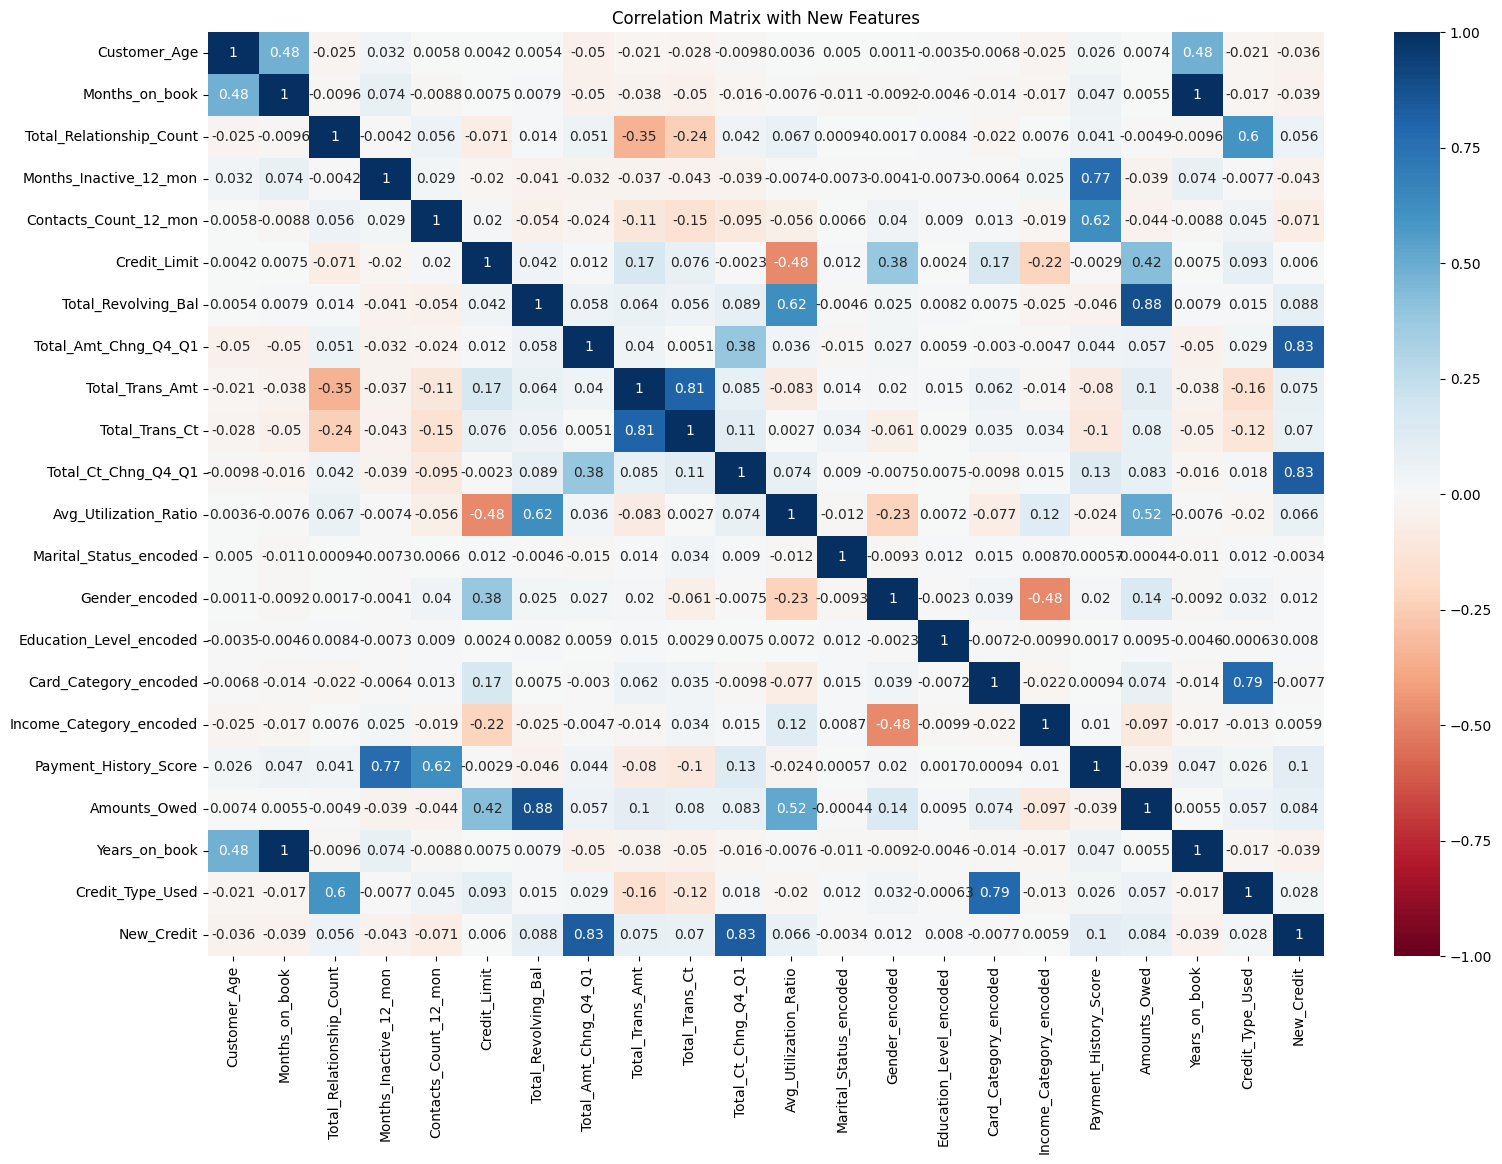

In [ ]:
correlation_matrix = df.corr()
correlation_matrix

# Plot the heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix with New Features')
plt.show()

Check Multicollinearity

In [ ]:
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# dropping columns having infinity in the multicollinearity
df_final = df.drop(columns=['Months_on_book', 'Total_Relationship_Count', 'Total_Trans_Amt', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
                                'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1'])

# Adding constant for the intercept
X = add_constant(df_final)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns
vif

,VIF,Feature
0,82.673862,const
1,1.301452,Customer_Age
2,1.113921,Total_Trans_Ct
3,3.297033,Total_Ct_Chng_Q4_Q1
4,1.620046,Avg_Utilization_Ratio
5,1.002476,Marital_Status_encoded
6,1.472006,Gender_encoded
7,1.000614,Education_Level_encoded
8,2.847126,Card_Category_encoded
9,1.312146,Income_Category_encoded


Text(0.5, 1.0, 'Multi Collinearity Check')

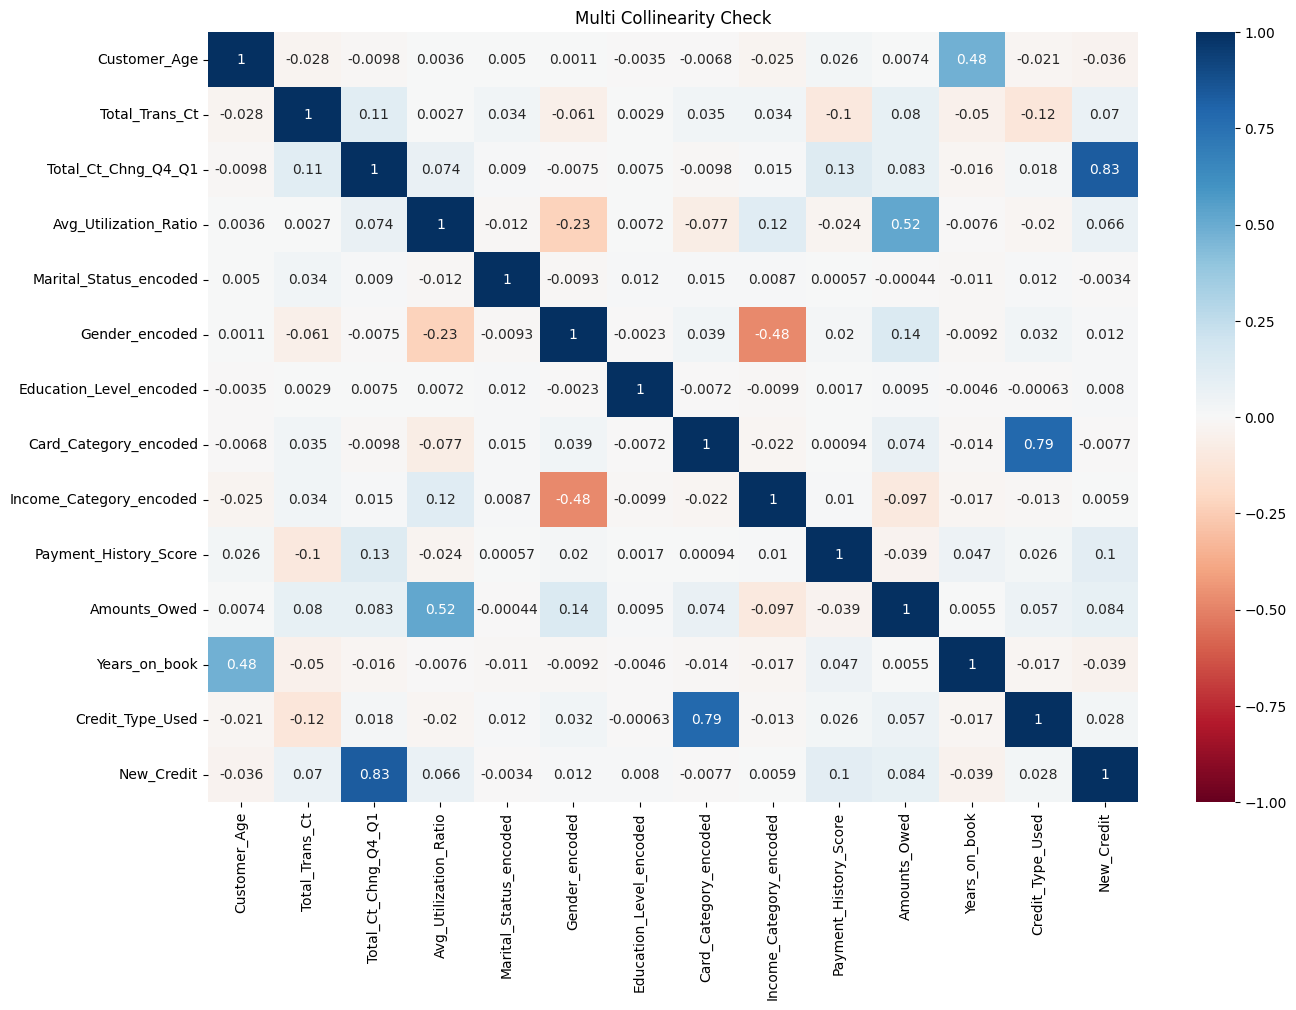

In [ ]:
import seaborn as sns
corr = df_final.corr()
df = df_final
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, center=0)
plt.title('Multi Collinearity Check')

## 4. Problem Definition - Calculate Credit Score

Feature Scaling and Feature Engineering

In [ ]:
# Normalize features
scaler = MinMaxScaler()
df[['Payment_History_Score', 'Amounts_Owed', 'Years_on_book',
    'Credit_Type_Used', 'New_Credit']] = scaler.fit_transform(df[['Payment_History_Score', 'Amounts_Owed',
                                                                  'Years_on_book', 'Credit_Type_Used', 'New_Credit']])

w1 = 0.35
w2 = 0.30
w3 = 0.15
w4 = 0.10
w5 = 0.10

# Calculate New Credit
df['Credit_Score_Number'] = (
    w1 * df['Payment_History_Score'] +
    w2 * df['Amounts_Owed'] +
    w1 * df['Years_on_book'] +
    w2 * df['Credit_Type_Used'] +
    w1 * df['New_Credit']
)

df

,Customer_Age,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded,Payment_History_Score,Amounts_Owed,Years_on_book,Credit_Type_Used,New_Credit,Credit_Score_Number
0,45.0,42,0.437534,0.061061,1,1,3,0.0,2,0.399687,0.342149,0.604651,0.4,0.442932,0.729189
1,49.0,33,1.000000,0.105105,4,0,2,0.0,4,0.572121,0.300525,0.720930,0.5,0.775244,0.964061
2,51.0,20,0.628164,0.000000,1,1,2,0.0,3,0.264907,0.033161,0.534884,0.3,0.742255,0.639665
3,40.0,20,0.628164,0.760761,4,0,3,0.0,4,0.627957,0.763100,0.488372,0.2,0.555587,0.874101
4,40.0,28,0.673129,0.000000,1,1,5,1.0,2,0.284497,0.054904,0.186047,0.9,0.700455,0.696320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,35.0,52,0.130856,0.112112,4,1,1,0.0,3,0.532317,0.502412,0.395349,0.4,0.184080,0.659835
10163,46.0,90,0.215401,0.529530,2,0,6,0.0,4,0.254506,0.407262,0.604651,0.1,0.195572,0.521334
10164,52.0,72,0.143242,0.796797,4,1,6,0.0,2,0.440899,0.713532,0.767442,0.2,0.169334,0.756246
10165,39.0,82,0.221325,0.421421,4,0,3,1.0,5,0.426510,0.388300,0.534884,0.5,0.246929,0.689403


Set Credit Score Range - 300 to 800

In [ ]:
# Define a function to convert normalized score to the range 300 to 800
def normalize_to_credit_score(normalized_score):
    return normalized_score * (800 - 300) + 300

# Apply the function to the 'Credit_Score' column
df['Credit_Score_300_800'] = df['Credit_Score_Number'].apply(normalize_to_credit_score)

# Convert float to int by rounding
df['Credit_Score'] = df['Credit_Score_300_800'].round().astype(int)
df

,Customer_Age,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded,Payment_History_Score,Amounts_Owed,Years_on_book,Credit_Type_Used,New_Credit,Credit_Score_Number,Credit_Score_300_800,Credit_Score
0,45.0,42,0.437534,0.061061,1,1,3,0.0,2,0.399687,0.342149,0.604651,0.4,0.442932,0.729189,664.594609,665
1,49.0,33,1.000000,0.105105,4,0,2,0.0,4,0.572121,0.300525,0.720930,0.5,0.775244,0.964061,782.030608,782
2,51.0,20,0.628164,0.000000,1,1,2,0.0,3,0.264907,0.033161,0.534884,0.3,0.742255,0.639665,619.832299,620
3,40.0,20,0.628164,0.760761,4,0,3,0.0,4,0.627957,0.763100,0.488372,0.2,0.555587,0.874101,737.050373,737
4,40.0,28,0.673129,0.000000,1,1,5,1.0,2,0.284497,0.054904,0.186047,0.9,0.700455,0.696320,648.160190,648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,35.0,52,0.130856,0.112112,4,1,1,0.0,3,0.532317,0.502412,0.395349,0.4,0.184080,0.659835,629.917389,630
10163,46.0,90,0.215401,0.529530,2,0,6,0.0,4,0.254506,0.407262,0.604651,0.1,0.195572,0.521334,560.667056,561
10164,52.0,72,0.143242,0.796797,4,1,6,0.0,2,0.440899,0.713532,0.767442,0.2,0.169334,0.756246,678.122975,678
10165,39.0,82,0.221325,0.421421,4,0,3,1.0,5,0.426510,0.388300,0.534884,0.5,0.246929,0.689403,644.701473,645


Create function to define the credit score status

In [ ]:
# Define target classification: 1 for Good/Excellent, 2 for Poor

df['Credit_Score_Classification'] = df['Credit_Score'].apply(lambda score: 1 if score >= 559 else 2)
df

,Customer_Age,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded,Payment_History_Score,Amounts_Owed,Years_on_book,Credit_Type_Used,New_Credit,Credit_Score_Number,Credit_Score_300_800,Credit_Score,Credit_Score_Classification
0,45.0,42,0.437534,0.061061,1,1,3,0.0,2,0.399687,0.342149,0.604651,0.4,0.442932,0.729189,664.594609,665,1
1,49.0,33,1.000000,0.105105,4,0,2,0.0,4,0.572121,0.300525,0.720930,0.5,0.775244,0.964061,782.030608,782,1
2,51.0,20,0.628164,0.000000,1,1,2,0.0,3,0.264907,0.033161,0.534884,0.3,0.742255,0.639665,619.832299,620,1
3,40.0,20,0.628164,0.760761,4,0,3,0.0,4,0.627957,0.763100,0.488372,0.2,0.555587,0.874101,737.050373,737,1
4,40.0,28,0.673129,0.000000,1,1,5,1.0,2,0.284497,0.054904,0.186047,0.9,0.700455,0.696320,648.160190,648,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,35.0,52,0.130856,0.112112,4,1,1,0.0,3,0.532317,0.502412,0.395349,0.4,0.184080,0.659835,629.917389,630,1
10163,46.0,90,0.215401,0.529530,2,0,6,0.0,4,0.254506,0.407262,0.604651,0.1,0.195572,0.521334,560.667056,561,1
10164,52.0,72,0.143242,0.796797,4,1,6,0.0,2,0.440899,0.713532,0.767442,0.2,0.169334,0.756246,678.122975,678,1
10165,39.0,82,0.221325,0.421421,4,0,3,1.0,5,0.426510,0.388300,0.534884,0.5,0.246929,0.689403,644.701473,645,1


Storing dependent Variables before Feature Scaling


In [ ]:
df_indepedent_Var = df[['Credit_Score', 'Credit_Score_Classification']]
df_indepedent_Var

,Credit_Score,Credit_Score_Classification
0,665,1
1,782,1
2,620,1
3,737,1
4,648,1
...,...,...
10162,630,1
10163,561,1
10164,678,1
10165,645,1


In [ ]:
df = df.drop(columns=['Credit_Score_Number', 'Credit_Score_300_800'])
df

,Customer_Age,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded,Payment_History_Score,Amounts_Owed,Years_on_book,Credit_Type_Used,New_Credit,Credit_Score,Credit_Score_Classification
0,45.0,42,0.437534,0.061061,1,1,3,0.0,2,0.399687,0.342149,0.604651,0.4,0.442932,665,1
1,49.0,33,1.000000,0.105105,4,0,2,0.0,4,0.572121,0.300525,0.720930,0.5,0.775244,782,1
2,51.0,20,0.628164,0.000000,1,1,2,0.0,3,0.264907,0.033161,0.534884,0.3,0.742255,620,1
3,40.0,20,0.628164,0.760761,4,0,3,0.0,4,0.627957,0.763100,0.488372,0.2,0.555587,737,1
4,40.0,28,0.673129,0.000000,1,1,5,1.0,2,0.284497,0.054904,0.186047,0.9,0.700455,648,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,35.0,52,0.130856,0.112112,4,1,1,0.0,3,0.532317,0.502412,0.395349,0.4,0.184080,630,1
10163,46.0,90,0.215401,0.529530,2,0,6,0.0,4,0.254506,0.407262,0.604651,0.1,0.195572,561,1
10164,52.0,72,0.143242,0.796797,4,1,6,0.0,2,0.440899,0.713532,0.767442,0.2,0.169334,678,1
10165,39.0,82,0.221325,0.421421,4,0,3,1.0,5,0.426510,0.388300,0.534884,0.5,0.246929,645,1


Pair Plot for Final Data

In [ ]:
# Visualize distributions
# sns.pairplot(df, diag_kind='kde')
# plt.show()

##5. Model Selection --  6. Evaluation and Interpretation

Feature Scaling

In [ ]:
#scale the independent features
df_independent_Var = df.drop(columns=['Credit_Score', 'Credit_Score_Classification'])

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_independent_Var)

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_independent_Var.columns)
df_new = df_scaled
df_new

,Customer_Age,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded,Payment_History_Score,Amounts_Owed,Years_on_book,Credit_Type_Used,New_Credit
0,0.058223,0.248062,0.437534,0.061061,0.25,0.5,0.500000,0.0,0.4,0.399687,0.342149,0.604651,0.4,0.442932
1,0.070481,0.178295,1.000000,0.105105,1.00,0.0,0.333333,0.0,0.8,0.572121,0.300525,0.720930,0.5,0.775244
2,0.076609,0.077519,0.628164,0.000000,0.25,0.5,0.333333,0.0,0.6,0.264907,0.033161,0.534884,0.3,0.742255
3,0.042901,0.077519,0.628164,0.760761,1.00,0.0,0.500000,0.0,0.8,0.627957,0.763100,0.488372,0.2,0.555587
4,0.042901,0.139535,0.673129,0.000000,0.25,0.5,0.833333,1.0,0.4,0.284497,0.054904,0.186047,0.9,0.700455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,0.027579,0.325581,0.130856,0.112112,1.00,0.5,0.166667,0.0,0.6,0.532317,0.502412,0.395349,0.4,0.184080
10163,0.061288,0.620155,0.215401,0.529530,0.50,0.0,1.000000,0.0,0.8,0.254506,0.407262,0.604651,0.1,0.195572
10164,0.079674,0.480620,0.143242,0.796797,1.00,0.5,1.000000,0.0,0.4,0.440899,0.713532,0.767442,0.2,0.169334
10165,0.039837,0.558140,0.221325,0.421421,1.00,0.0,0.500000,1.0,1.0,0.426510,0.388300,0.534884,0.5,0.246929


In [ ]:
df = pd.concat([df_new, df_indepedent_Var], axis=1)
df

,Customer_Age,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded,Payment_History_Score,Amounts_Owed,Years_on_book,Credit_Type_Used,New_Credit,Credit_Score,Credit_Score_Classification
0,0.058223,0.248062,0.437534,0.061061,0.25,0.5,0.500000,0.0,0.4,0.399687,0.342149,0.604651,0.4,0.442932,665,1
1,0.070481,0.178295,1.000000,0.105105,1.00,0.0,0.333333,0.0,0.8,0.572121,0.300525,0.720930,0.5,0.775244,782,1
2,0.076609,0.077519,0.628164,0.000000,0.25,0.5,0.333333,0.0,0.6,0.264907,0.033161,0.534884,0.3,0.742255,620,1
3,0.042901,0.077519,0.628164,0.760761,1.00,0.0,0.500000,0.0,0.8,0.627957,0.763100,0.488372,0.2,0.555587,737,1
4,0.042901,0.139535,0.673129,0.000000,0.25,0.5,0.833333,1.0,0.4,0.284497,0.054904,0.186047,0.9,0.700455,648,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,0.027579,0.325581,0.130856,0.112112,1.00,0.5,0.166667,0.0,0.6,0.532317,0.502412,0.395349,0.4,0.184080,630,1
10163,0.061288,0.620155,0.215401,0.529530,0.50,0.0,1.000000,0.0,0.8,0.254506,0.407262,0.604651,0.1,0.195572,561,1
10164,0.079674,0.480620,0.143242,0.796797,1.00,0.5,1.000000,0.0,0.4,0.440899,0.713532,0.767442,0.2,0.169334,678,1
10165,0.039837,0.558140,0.221325,0.421421,1.00,0.0,0.500000,1.0,1.0,0.426510,0.388300,0.534884,0.5,0.246929,645,1


In [ ]:
X = df.drop(columns=['Credit_Score', 'Credit_Score_Classification'])
X

,Customer_Age,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded,Payment_History_Score,Amounts_Owed,Years_on_book,Credit_Type_Used,New_Credit
0,0.058223,0.248062,0.437534,0.061061,0.25,0.5,0.500000,0.0,0.4,0.399687,0.342149,0.604651,0.4,0.442932
1,0.070481,0.178295,1.000000,0.105105,1.00,0.0,0.333333,0.0,0.8,0.572121,0.300525,0.720930,0.5,0.775244
2,0.076609,0.077519,0.628164,0.000000,0.25,0.5,0.333333,0.0,0.6,0.264907,0.033161,0.534884,0.3,0.742255
3,0.042901,0.077519,0.628164,0.760761,1.00,0.0,0.500000,0.0,0.8,0.627957,0.763100,0.488372,0.2,0.555587
4,0.042901,0.139535,0.673129,0.000000,0.25,0.5,0.833333,1.0,0.4,0.284497,0.054904,0.186047,0.9,0.700455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,0.027579,0.325581,0.130856,0.112112,1.00,0.5,0.166667,0.0,0.6,0.532317,0.502412,0.395349,0.4,0.184080
10163,0.061288,0.620155,0.215401,0.529530,0.50,0.0,1.000000,0.0,0.8,0.254506,0.407262,0.604651,0.1,0.195572
10164,0.079674,0.480620,0.143242,0.796797,1.00,0.5,1.000000,0.0,0.4,0.440899,0.713532,0.767442,0.2,0.169334
10165,0.039837,0.558140,0.221325,0.421421,1.00,0.0,0.500000,1.0,1.0,0.426510,0.388300,0.534884,0.5,0.246929


In [ ]:
y = df['Credit_Score']
y

,Credit_Score
0,665
1,782
2,620
3,737
4,648
...,...
10162,630
10163,561
10164,678
10165,645


Scatter Plot for Credit Score Comparison with its featured columns

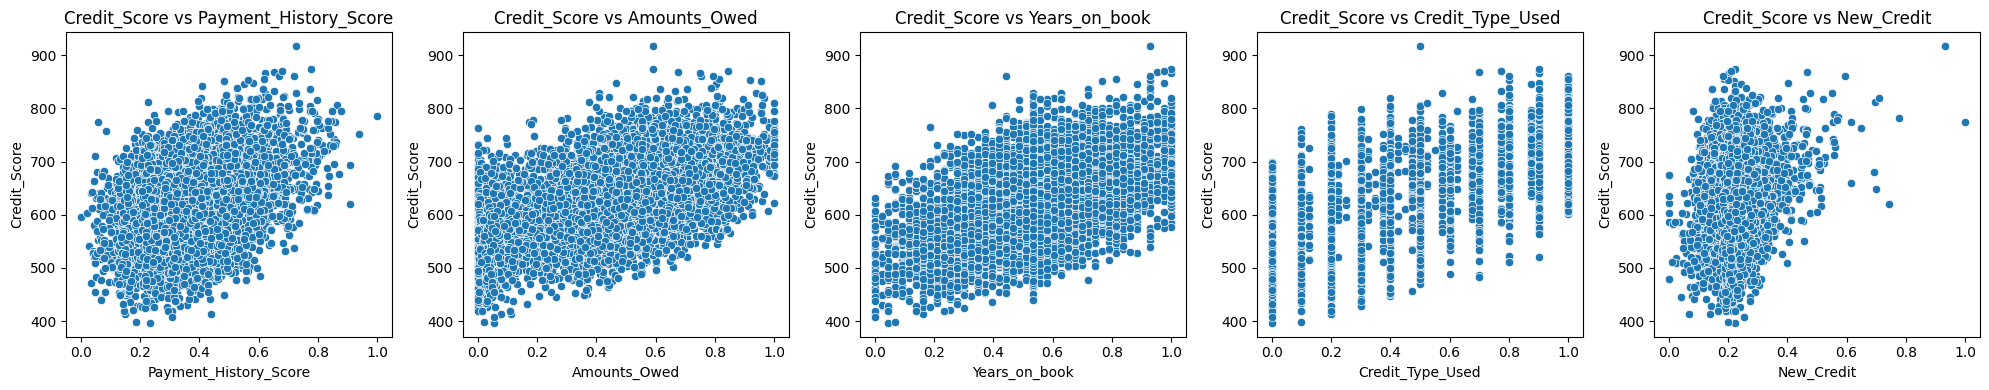

In [ ]:
credit_features = ['Payment_History_Score', 'Amounts_Owed', 'Years_on_book', 'Credit_Type_Used', 'New_Credit']

num_features = len(credit_features)
rows = (num_features // 5) + (num_features % 5 > 0)

# Create subplots: rows by 5 columns
fig, axs = plt.subplots(rows, 5, figsize=(20, 4))

#Plot Scatter Plot for each credit feature
for i, feature in enumerate(credit_features):
    sns.scatterplot(data=df, x=feature, y='Credit_Score', ax=axs[i])
    axs[i].set_title(f'Credit_Score vs {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Credit_Score')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df_credit_features = df[['Payment_History_Score', 'Amounts_Owed', 'Years_on_book', 'Credit_Type_Used', 'New_Credit', 'Credit_Score']]
df_credit_features
df_credit_features.corr()

,Payment_History_Score,Amounts_Owed,Years_on_book,Credit_Type_Used,New_Credit,Credit_Score
Payment_History_Score,1.000000,-0.038733,0.047042,0.025844,0.102853,0.360740
Amounts_Owed,-0.038733,1.000000,0.005540,0.056696,0.083991,0.564399
Years_on_book,0.047042,0.005540,1.000000,-0.017102,-0.039493,0.472972
Credit_Type_Used,0.025844,0.056696,-0.017102,1.000000,0.028376,0.589320
New_Credit,0.102853,0.083991,-0.039493,0.028376,1.000000,0.221653
Credit_Score,0.360740,0.564399,0.472972,0.589320,0.221653,1.000000


###Linear Regression##

###Logistic Regression##

Model Training

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

y = df['Credit_Score_Classification']

# Convert target variable to numeric if it's categorical
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)


LogisticRegression()

Model Evaluation

In [ ]:
# Make predictions
y_pred = log_model.predict(X_train_scaled)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
recall = recall_score(y_train, y_pred, average='weighted')
f1 = f1_score(y_train, y_pred, average='weighted')
confusion1 = confusion_matrix(y_train, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("\nConfusion Matrix:", confusion1)
# print("\nClassification Report:", classification_report(y_test, y_pred))

Accuracy: 0.998
Precision: 0.998
Recall: 0.998
F1 Score: 0.998

Confusion Matrix: [[6673    3]
 [  15 1442]]


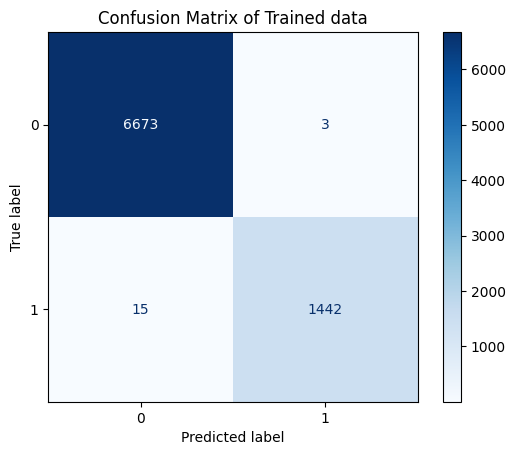

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import seaborn as sns

# Visualisation of Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion1)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix of Trained data")
plt.show()

In [ ]:
# Make predictions
y_pred = log_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("\nConfusion Matrix:", confusion)
# print("\nClassification Report:", classification_report(y_test, y_pred))

Accuracy: 0.997
Precision: 0.997
Recall: 0.983
F1 Score: 0.990

Confusion Matrix: [[1674    1]
 [   6  353]]


Plot Confusion Matrix

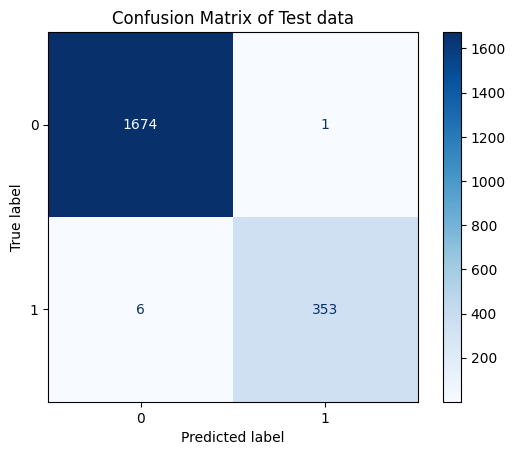

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import seaborn as sns

# Visualisation of Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix of Test data")
plt.show()


####Model Building

ROC AUC Score: 1.00


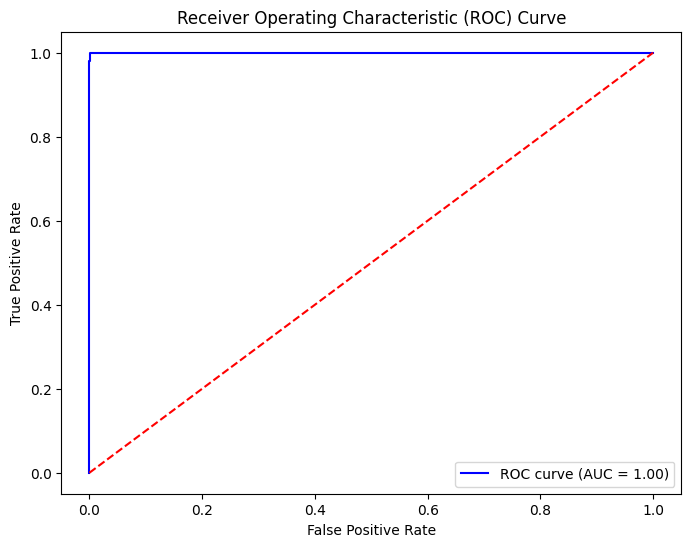

In [ ]:
# Get the predicted probabilities for ROC curve
y_prob = log_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### Use Model For Prediction


In [ ]:
def predict_credit_score(user_input):
    # User input must be a list or array with the same feature order as in training
    user_input_scaled = scaler.transform(user_input)
    prediction = log_model.predict(user_input_scaled)
    return le_target.inverse_transform(prediction)[0]

user_input_Customer_Age = float(input("Enter Customer Age (0 to 1): "))
user_input_Total_Trans_Ct = float(input("Enter Total_Trans_Ct (0 to 1): "))
user_input_Total_Ct_Chng_Q4_Q1 = float(input("Enter Total_Ct_Chng_Q4_Q1 (0 to 1): "))
user_input_Avg_Utilization_Ratio = float(input("Enter Avg_Utilization_Ratio (0 to 1): "))
user_input_Marital_Status_encoded = float(input("Enter Marital_Status_encoded (0 to 1): "))
user_input_Gender_encoded = float(input("Enter Gender_encoded (0 to 1): "))
user_input_Education_Level_encoded = float(input("Enter Education_Level_encoded (0 to 1): "))
user_input_Card_Category_encoded = float(input("Enter Card_Category_encoded (0 to 1): "))
user_input_Income_Category_encoded = float(input("Enter Income_Category_encoded (0 to 1): "))
user_input_Payment_History_Score = float(input("Enter Payment History Score (0 to 1): "))
user_input_Amounts_Owed = float(input("Enter Amounts Owed (0 to 1): "))
user_input_Years_on_book = float(input("Enter Years on book (0 to 1): "))
user_input_Credit_Type_Used = float(input("Enter Credit Type Used (0 to 1): "))
user_input_New_Credit = float(input("Enter New Credit (0 to 1): "))

pred_vec_log = pd.DataFrame({
                  'Customer_Age': [user_input_Customer_Age],
                  'Total_Trans_Ct': [user_input_Total_Trans_Ct],
                  'Total_Ct_Chng_Q4_Q1': [user_input_Total_Ct_Chng_Q4_Q1],
                  'Avg_Utilization_Ratio': [user_input_Avg_Utilization_Ratio],
                  'Marital_Status_encoded': [user_input_Marital_Status_encoded],
                  'Gender_encoded': [user_input_Gender_encoded],
                  'Education_Level_encoded': [user_input_Education_Level_encoded],
                  'Card_Category_encoded': [user_input_Card_Category_encoded],
                  'Income_Category_encoded': [user_input_Income_Category_encoded],
                  'Payment_History_Score': [user_input_Payment_History_Score],
                  'Amounts_Owed': [user_input_Amounts_Owed],
                  'Years_on_book': [user_input_Years_on_book],
                  'Credit_Type_Used': [user_input_Credit_Type_Used],
                  'New_Credit': [user_input_New_Credit],
                })


predictedCreditScore = predict_credit_score(pred_vec_log)
print(f"\nYour Credit Score Classification is : {predictedCreditScore}")

###KNN

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features and target variable
y = df['Credit_Score_Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.92
Precision: 0.93
Recall: 0.97
F1 Score: 0.95
Confusion Matrix:
[[1627   48]
 [ 117  242]]
Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.97      0.95      1675
           2       0.83      0.67      0.75       359

    accuracy                           0.92      2034
   macro avg       0.88      0.82      0.85      2034
weighted avg       0.92      0.92      0.92      2034



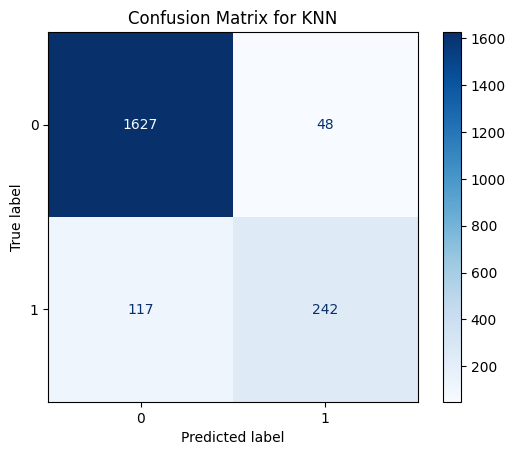

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import seaborn as sns

# Visualisation of Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for KNN")
plt.show()

In [ ]:
def predict_credit_score(user_input):
    # User input must be a list or array with the same feature order as in training
    user_input_scaled = scaler.transform(user_input)
    prediction = log_model.predict(user_input_scaled)
    return le_target.inverse_transform(prediction)[0]

user_input_Customer_Age = float(input("Enter Customer Age (0 to 1): "))
user_input_Total_Trans_Ct = float(input("Enter Total_Trans_Ct (0 to 1): "))
user_input_Total_Ct_Chng_Q4_Q1 = float(input("Enter Total_Ct_Chng_Q4_Q1 (0 to 1): "))
user_input_Avg_Utilization_Ratio = float(input("Enter Avg_Utilization_Ratio (0 to 1): "))
user_input_Marital_Status_encoded = float(input("Enter Marital_Status_encoded (0 to 1): "))
user_input_Gender_encoded = float(input("Enter Gender_encoded (0 to 1): "))
user_input_Education_Level_encoded = float(input("Enter Education_Level_encoded (0 to 1): "))
user_input_Card_Category_encoded = float(input("Enter Card_Category_encoded (0 to 1): "))
user_input_Income_Category_encoded = float(input("Enter Income_Category_encoded (0 to 1): "))
user_input_Payment_History_Score = float(input("Enter Payment History Score (0 to 1): "))
user_input_Amounts_Owed = float(input("Enter Amounts Owed (0 to 1): "))
user_input_Years_on_book = float(input("Enter Years on book (0 to 1): "))
user_input_Credit_Type_Used = float(input("Enter Credit Type Used (0 to 1): "))
user_input_New_Credit = float(input("Enter New Credit (0 to 1): "))

pred_vec_knn = pd.DataFrame({
                  'Customer_Age': [user_input_Customer_Age],
                  'Total_Trans_Ct': [user_input_Total_Trans_Ct],
                  'Total_Ct_Chng_Q4_Q1': [user_input_Total_Ct_Chng_Q4_Q1],
                  'Avg_Utilization_Ratio': [user_input_Avg_Utilization_Ratio],
                  'Marital_Status_encoded': [user_input_Marital_Status_encoded],
                  'Gender_encoded': [user_input_Gender_encoded],
                  'Education_Level_encoded': [user_input_Education_Level_encoded],
                  'Card_Category_encoded': [user_input_Card_Category_encoded],
                  'Income_Category_encoded': [user_input_Income_Category_encoded],
                  'Payment_History_Score': [user_input_Payment_History_Score],
                  'Amounts_Owed': [user_input_Amounts_Owed],
                  'Years_on_book': [user_input_Years_on_book],
                  'Credit_Type_Used': [user_input_Credit_Type_Used],
                  'New_Credit': [user_input_New_Credit],
                })


predictedCreditScore = predict_credit_score(pred_vec_knn)
print(f"\nYour Credit Score Classification is : {predictedCreditScore}")

### K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

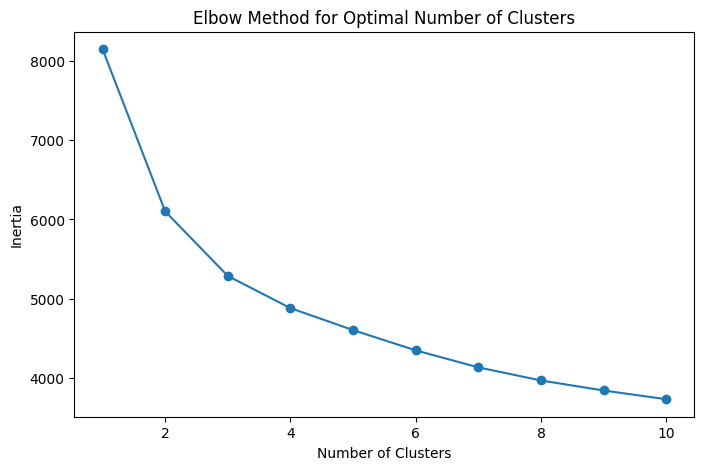

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

y = df['Credit_Score_Classification']

# Standardize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
K = range(2, 6) # range from 2 to 7 for setting k no. of cluster to hit and trial
wcss = []

for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_scaled) # k is 2, then 3, then 4, then 5, then 6, then 7

    print(model.inertia_)
    # Append the within-cluster sum of square to wcss
    wcss.append(model.inertia_) # added new sum sqaure output in wcs list

# clusters = kmeans.fit_predict(X_scaled)
# silhouette_avg = silhouette_score(X_scaled, clusters)
# print(f'Silhouette Score: {silhouette_avg}')

6101.031226622039
5285.660842856962
4881.955841324305
4601.711677020102


In [ ]:
# Choose the optimal number of clusters (e.g., 2 based on the Elbow Method)
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Evaluate the clustering performance - The Silhouette Score is a metric used to evaluate the quality of clustering results. It measures how similar each data point is to its own cluster compared to other clusters.
# The score provides a way to assess how well-defined and separated the clusters are
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Display the cluster centers - Cluster centers give insight into the central tendency of clusters and help in understanding the distribution of data within each cluster.
print('\nCluster Centers:')
print(kmeans.cluster_centers_)

print('\nCluster Inertia:')
print(kmeans.inertia_)

print('\nkmeans Labels:')
print(len(kmeans.labels_))

# Display the first few rows with cluster assignments
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.2954419579393619

Cluster Centers:
[[0.06374492 0.42145753 0.19208759 0.28878647 0.48565732 0.24446874
  0.51702255 0.00382686 0.57728325 0.3829785  0.41517771 0.53370508
  0.28499807 0.22177327]
 [0.06311873 0.43780795 0.19069024 0.23017376 0.49655244 0.27162557
  0.51149185 0.95048057 0.55871291 0.38302369 0.46395915 0.52817812
  0.75016715 0.22078468]]

Cluster Inertia:
6101.031226622039

kmeans Labels:
10167


,Customer_Age,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_encoded,Gender_encoded,Education_Level_encoded,Card_Category_encoded,Income_Category_encoded,Payment_History_Score,Amounts_Owed,Years_on_book,Credit_Type_Used,New_Credit,Credit_Score,Credit_Score_Classification,Cluster
0,0.058223,0.248062,0.437534,0.061061,0.25,0.5,0.500000,0.0,0.4,0.399687,0.342149,0.604651,0.4,0.442932,665,1,0
1,0.070481,0.178295,1.000000,0.105105,1.00,0.0,0.333333,0.0,0.8,0.572121,0.300525,0.720930,0.5,0.775244,782,1,0
2,0.076609,0.077519,0.628164,0.000000,0.25,0.5,0.333333,0.0,0.6,0.264907,0.033161,0.534884,0.3,0.742255,620,1,0
3,0.042901,0.077519,0.628164,0.760761,1.00,0.0,0.500000,0.0,0.8,0.627957,0.763100,0.488372,0.2,0.555587,737,1,0
4,0.042901,0.139535,0.673129,0.000000,0.25,0.5,0.833333,1.0,0.4,0.284497,0.054904,0.186047,0.9,0.700455,648,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,0.027579,0.325581,0.130856,0.112112,1.00,0.5,0.166667,0.0,0.6,0.532317,0.502412,0.395349,0.4,0.184080,630,1,0
10163,0.061288,0.620155,0.215401,0.529530,0.50,0.0,1.000000,0.0,0.8,0.254506,0.407262,0.604651,0.1,0.195572,561,1,0
10164,0.079674,0.480620,0.143242,0.796797,1.00,0.5,1.000000,0.0,0.4,0.440899,0.713532,0.767442,0.2,0.169334,678,1,0
10165,0.039837,0.558140,0.221325,0.421421,1.00,0.0,0.500000,1.0,1.0,0.426510,0.388300,0.534884,0.5,0.246929,645,1,1


Graph for K-Means Clustering

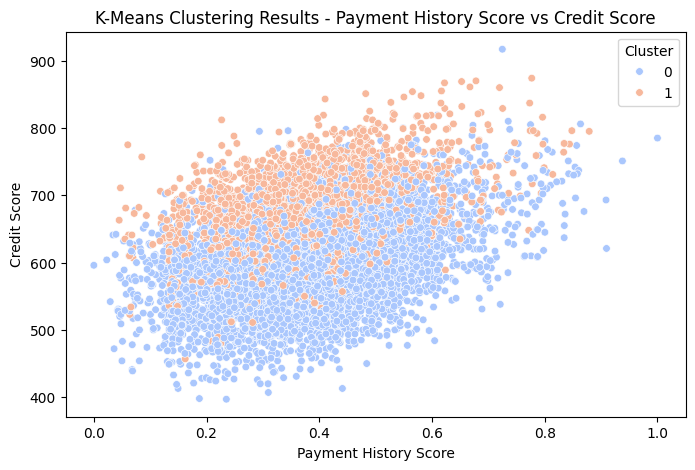

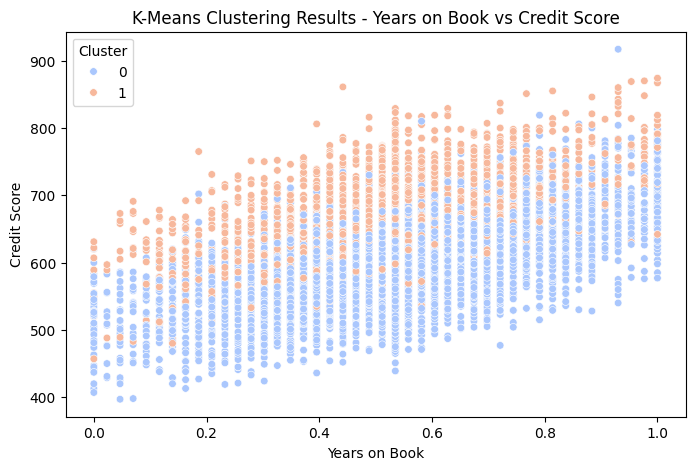

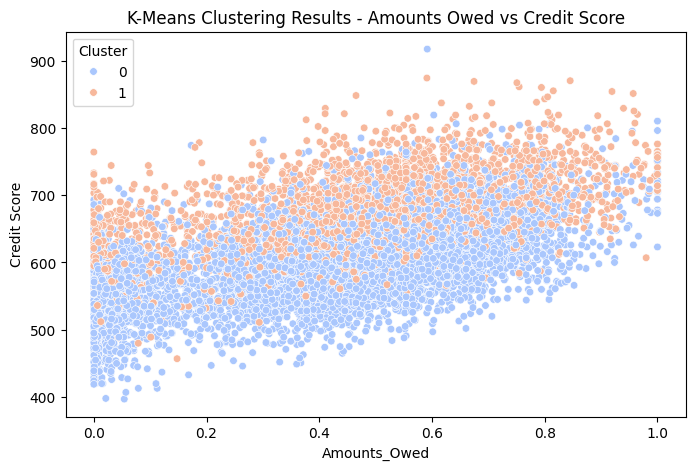

In [ ]:
plt.figure(figsize=(8, 5))
palette = sns.color_palette("hsv", optimal_clusters)  # Generate a color palette for clusters

sns.scatterplot(x='Payment_History_Score', y='Credit_Score', hue='Cluster', data=df, palette='coolwarm', s=30)
plt.title('K-Means Clustering Results - Payment History Score vs Credit Score')
plt.xlabel('Payment History Score')
plt.ylabel('Credit Score')
plt.legend(title='Cluster')
plt.show()

# Scatter plot for Years on Book vs Credit Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Years_on_book', y='Credit_Score', hue='Cluster', data=df, palette='coolwarm', s=30)
plt.title('K-Means Clustering Results - Years on Book vs Credit Score')
plt.xlabel('Years on Book')
plt.ylabel('Credit Score')
plt.legend(title='Cluster')
plt.show()

# Scatter plot for Amounts_Owed vs Credit Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Amounts_Owed', y='Credit_Score', hue='Cluster', data=df, palette='coolwarm', s=30)
plt.title('K-Means Clustering Results - Amounts Owed vs Credit Score')
plt.xlabel('Amounts_Owed')
plt.ylabel('Credit Score')
plt.legend(title='Cluster')
plt.show()